<a href="https://colab.research.google.com/github/ivangonquir/NLP_BSC/blob/main/bsc_internship_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

In [ ]:
!pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [ ]:
!pip show tensorflow keras tensorflow-hub

# The Attention Mechanism

## Self-Attention

In [ ]:
sentence = "Maria is cheerful and she is my sister."

Given the sentence *Maria is cheeful and she is my sister*, we observe that it has 8 words or tokens. If we just consider the word **she**, we see that **and** and **is** are the closest ones to it, but they do not give any context to **she**. Contrastingly, the words **Maria** and **sister**, which are further away, provide more relevant information.

When this sentence enters a computer, it considers each word as a token *t*, and each token has a word embedding $V$, but without any context. Hence, we want to apply some weighting or similar technique to give more importance to the words that provide more relevant information or context.

In an embedding space, similar words present similar values for their dimensions. Hence, if we multiply via a dot product word embedding vectors we can obtain new weight vectors $W$ that contain the information about the context. Let us see an example:

In [96]:
sentence = "An apple is a fruit"
word1 = "An"
word2 = "apple"
word3 = "is"
word4 = "a"
word5 = "fruit"
v1 = np.array([0.1,0.2,0.2,0.01])
v2 = np.array([0.1,0.2,0.9,0.8])
v3 = np.array([0.1,0.2,0.1,0.005])
v4 = np.array([0.01,0.02,0.005,0.1])
v5 = np.array([0.01,0.2,0.9,0.75])

We have created three vectors for each one of the words, and since *apple* and *banana* may appear in similar contexts rather than with *table*, we have assigned to the former two similar vectors.

If we than compute the dot product between each pair of the three vectors, we obtain:

In [97]:
V = np.array([v1,v2,v3,v4,v5])

In [98]:
W11 = np.outer(v1,v1)
W12 = np.outer(v1,v2)
W13 = np.outer(v1,v3)
W14 = np.outer(v1,v4)
W15 = np.outer(v1,v5)
W21 = np.outer(v2,v1)
W22 = np.outer(v2,v2)
W23 = np.outer(v2,v3)
W24 = np.outer(v2,v4)
W25 = np.outer(v2,v5)
W31 = np.outer(v3,v1)
W32 = np.outer(v3,v2)
W33 = np.outer(v3,v3)
W34 = np.outer(v3,v4)
W35 = np.outer(v3,v5)
W41 = np.outer(v4,v1)
W42 = np.outer(v4,v2)
W43 = np.outer(v4,v3)
W44 = np.outer(v4,v4)
W45 = np.outer(v4,v5)
W51 = np.outer(v5,v1)
W52 = np.outer(v5,v2)
W53 = np.outer(v5,v3)
W54 = np.outer(v5,v4)
W55 = np.outer(v5,v5)

Take a look at the last column of W25.

In [99]:
W12, W25

(array([[0.01 , 0.02 , 0.09 , 0.08 ],
        [0.02 , 0.04 , 0.18 , 0.16 ],
        [0.02 , 0.04 , 0.18 , 0.16 ],
        [0.001, 0.002, 0.009, 0.008]]),
 array([[0.001, 0.02 , 0.09 , 0.075],
        [0.002, 0.04 , 0.18 , 0.15 ],
        [0.009, 0.18 , 0.81 , 0.675],
        [0.008, 0.16 , 0.72 , 0.6  ]]))

We observe that they are simmetric because the dot product of two vectors is bilineal form.

In [100]:
W12 - W21.T, W13 - W31.T, W23 - W32.T

(array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]),
 array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]))

The next thing is to normalize each one of the weight vectors:

In [101]:
d = 4 #Number of dimension embeddings

scale = 1 / np.sqrt(d)

W11 = W11*scale
W12 = W12*scale
W13 = W13*scale
W14 = W14*scale
W15 = W15*scale
W21 = W21*scale
W22 = W22*scale
W23 = W23*scale
W24 = W24*scale
W25 = W25*scale
W31 = W31*scale
W32 = W32*scale
W33 = W33*scale
W34 = W34*scale
W35 = W35*scale
W41 = W41*scale
W42  = W42*scale
W43 = W43*scale
W44 = W44*scale
W45 = W45*scale
W51 = W51*scale
W52 = W52*scale
W53 = W53*scale
W54 = W54*scale
W55 = W55*scale

W12, W13, W23

(array([[0.005 , 0.01  , 0.045 , 0.04  ],
        [0.01  , 0.02  , 0.09  , 0.08  ],
        [0.01  , 0.02  , 0.09  , 0.08  ],
        [0.0005, 0.001 , 0.0045, 0.004 ]]),
 array([[5.0e-03, 1.0e-02, 5.0e-03, 2.5e-04],
        [1.0e-02, 2.0e-02, 1.0e-02, 5.0e-04],
        [1.0e-02, 2.0e-02, 1.0e-02, 5.0e-04],
        [5.0e-04, 1.0e-03, 5.0e-04, 2.5e-05]]),
 array([[0.005  , 0.01   , 0.005  , 0.00025],
        [0.01   , 0.02   , 0.01   , 0.0005 ],
        [0.045  , 0.09   , 0.045  , 0.00225],
        [0.04   , 0.08   , 0.04   , 0.002  ]]))

Finally, we multiply each input vector by the weight matrix:

In [102]:
y1 = v1 @ W11 + v2 @ W12 + v3 @ W13 + v4 @ W14 + v4 @ W15
y2 = v1 @ W21 + v2 @ W22 + v3 @ W23 + v4 @ W24 + v4 @ W25
y3 = v1 @ W31 + v2 @ W32 + v3 @ W33 + v4 @ W34 + v4 @ W35
y4 = v1 @ W41 + v2 @ W42 + v3 @ W43 + v4 @ W44 + v4 @ W45
y5 = v1 @ W51 + v2 @ W52 + v3 @ W53 + v4 @ W54 + v4 @ W55

In [103]:
y1,y2,y3,y4,y5

(array([0.0199775 , 0.040585  , 0.12278   , 0.09880063]),
 array([0.094995  , 0.198045  , 0.74649875, 0.6395875 ]),
 array([0.01376375, 0.0280675 , 0.07752125, 0.06065031]),
 array([0.00523025, 0.01140775, 0.04603756, 0.04032313]),
 array([0.0915485 , 0.190621  , 0.7203665 , 0.61740938]))

We now see that vectors 2 and 5 have close values for the latter two coordinates.

W21 to W23 are the weights that have the context information of the first word v2. Hence, when we are multiplying these weights to each word we are essentially reweighting all the other words towards the first one. That is, the word *apple* is now tending more towards the word *fruit* rather than the word that comes after it, *is*.

## Queries, Keys and Values


# Imports

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow import keras, matmul, math, cast, float32
from tensorflow.keras.layers import Layer, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import torch
import torch.nn.functional as F
import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt

# The Transformer and Multi-Head Attention Mechanism

The Transformer Language Models are the most recent ones used in NLP. They basically consists in three stages:
- The input stage = Input Embedding + Positional Encoding
- $n$ times transformer blocks (encoding layers) with different parameters.
- The output stage = Linear + Softmax.

Below we have an example of 6 transfomer modules.

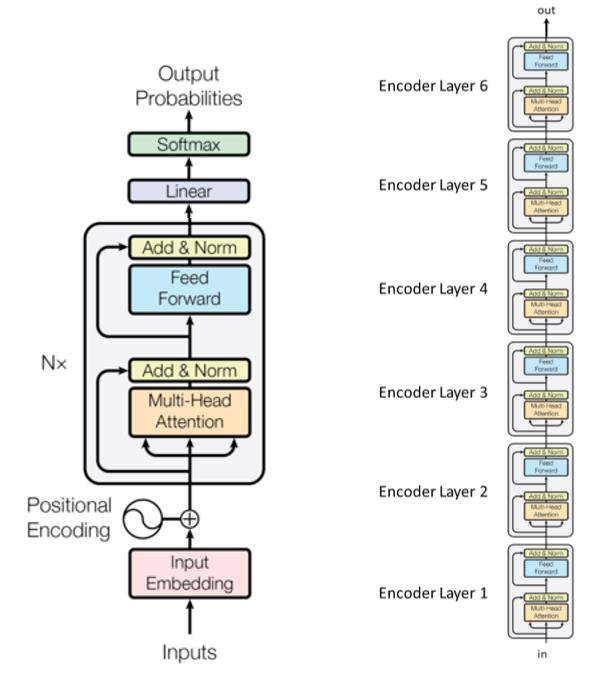

## 1 - Input

### 1.1 - Input Embedding
We convert the input tokens (words or subwords) into vectors using embedding layers. That is, each token is embedded into a vector of fixed-size. Say that the input is the following:

In [2]:
sentences = ["My name is Ivan.",
             "I am studying NLP",
             "Pineapple pizze should be banned.",
             "When you play the Game of Thrones...",
]
tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)


Now we create our tokenizer and fit it on the set of sentences.

In [ ]:
tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(sentences)

We can access the word index, which gives us information about which numbers have been assigned to each word:

In [ ]:
word_index = tokenizer.word_index

x_test = "I like basketball."
tok2 = Tokenizer(num_words = 100, oov_token = "<OOV>")
tok2.fit_on_texts(x_test)
word_index2 = tok2.word_index
print(word_index)
print(word_index2)

{'<OOV>': 1, 'my': 2, 'name': 3, 'is': 4, 'ivan': 5, 'i': 6, 'am': 7, 'studying': 8, 'nlp': 9, 'pineapple': 10, 'pizze': 11, 'should': 12, 'be': 13, 'banned': 14, 'when': 15, 'you': 16, 'play': 17, 'the': 18, 'game': 19, 'of': 20, 'thrones': 21}
{'<OOV>': 1, 'l': 2, 'i': 3, 'k': 4, 'e': 5, 'b': 6, 'a': 7, 's': 8, 't': 9}


We observe that in word index the tokens are words, wheareas in word_index2 the tokens are letters.

Once we have our dictionary with the relationship between numbers and words, we can embed our input sentences into multidimensional vectors:

In [4]:
vocab_size = 50_000 #Still don't know what is
input_dim = vocab_size
output_dim = 4

embed = keras.layers.Embedding(input_dim, output_dim)

In [5]:
sequences = tokenizer.texts_to_sequences(sentences)

Look what happens now:


In [18]:
try:
  embed_sequences = embed(sequences)
except Exception as e:
  print(f"Error --- {e}")
  print("We need to use a tensor, but if we try to convert the sequences into an array...")
  print()

  print(f"The sequences are {sequences}")
  try:
    tensor_sequences = np.array(sequences)
  except Exception as e:
    print(f"Error --- {e}")
    print("We see that we can't convert a list of lists of different dimensions into an array. Hence, we need to pad each list such that all of them have the same number of elements.")
    print()

    try:
      padded = pad_sequences(sequences, padding = 'post', truncating = 'post', maxlen = 9)
      print("Padded sequences:")
      print(padded)

      print()
      out_embedding = embed(padded)
      print("Embedded sequences:")
      print(out_embedding)
    except Exception as e:
      print(e)




Error --- Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: 2 (of type <class 'int'>)
We need to use a tensor, but if we try to convert the sequences into an array...

The sequences are [[2, 3, 4, 5], [6, 7, 8, 9], [10, 11, 12, 13, 14], [15, 16, 17, 18, 19, 20, 21]]
Error --- setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.
We see that we can't convert a list of lists of different dimensions into an array. Hence, we need to pad each list such that all of them have the same number of elements.

Padded sequences:
[[ 2  3  4  5  0  0  0  0  0]
 [ 6  7  8  9  0  0  0  0  0]
 [10 11 12 13 14  0  0  0  0]
 [15 16 17 18 19 20 21  0  0]]

Embedded sequences:
tf.Tensor(
[[[ 1.5176833e-05 -1.3905514e-02 -4.2545032e-02  2.7902488e-02]
  [-3.3010982e-02 -7.7870861e-03 -1.3672613e-02  2.9187087e-02]
  [-2.4563169e-

We observe that we get an array of shape (4,9,4) = (#Number of sentences, #Number of input tokens (taking into account the 0's of the padding), #Number of embeddding dimensions).

The following cell shows which is the output for each input sentence:

In [17]:
for i in range(len(sentences)):
  s = sentences[i]
  input = padded[i]
  output = out_embedding[i]
  print("--------------------------------------")
  print(f"Original sentence = {s}")
  print(f"Input = {input}")
  print(f"Output = {output}")

--------------------------------------
Original sentence = My name is Ivan.
Input = [2 3 4 5 0 0 0 0 0]
Output = [[ 1.5176833e-05 -1.3905514e-02 -4.2545032e-02  2.7902488e-02]
 [-3.3010982e-02 -7.7870861e-03 -1.3672613e-02  2.9187087e-02]
 [-2.4563169e-02 -4.2894509e-02  3.0193813e-03  2.7385030e-02]
 [ 3.0917171e-02  2.3642097e-02  1.6370788e-03 -2.0438707e-02]
 [ 4.1079912e-02 -1.6460311e-02  2.4580825e-02 -4.5413088e-02]
 [ 4.1079912e-02 -1.6460311e-02  2.4580825e-02 -4.5413088e-02]
 [ 4.1079912e-02 -1.6460311e-02  2.4580825e-02 -4.5413088e-02]
 [ 4.1079912e-02 -1.6460311e-02  2.4580825e-02 -4.5413088e-02]
 [ 4.1079912e-02 -1.6460311e-02  2.4580825e-02 -4.5413088e-02]]
--------------------------------------
Original sentence = I am studying NLP
Input = [6 7 8 9 0 0 0 0 0]
Output = [[ 0.01064249  0.02553057  0.00867591  0.02885517]
 [-0.03380316 -0.04483243 -0.01423653 -0.02658187]
 [ 0.01633073 -0.0258299   0.01934067 -0.04901301]
 [ 0.04213804 -0.04287405 -0.01682872  0.00778121]
 

Each dimension of the word embedding tries to capture some linguistic feature about that word, such as whether the word is a verb or an entity or something else, but it can be non-trivial to know what these dimensions represent. The values in each dimensions represent the coordinates of the words in some hyper-space, and during training the values of words that appear in similar contexts, such as *play* and *game* are updated and get closer and closer. [[4]](https://www.youtube.com/watch?v=dichIcUZfOw)

LSTM (Long Short Term Memory) would take each one of the embeddings one by one, something that would be really slow, and hence they know the order of the words because they take the embeddings sequentially. In contrast, Transformers take all the embeddings all at once, something much faster but that looses the information about the embeddings' positions. For example, we would have problems with the sentences:
- *Even though she did not win the award, she was satisfied*
- *Even though she did win the awards, she was not satisfied*.

Here the word *not* has the same token, but since the Transformer would not take into account its position, we will loose valuable information (the sentences have different meanings).


### 1.2 -  Positional encoding


It describes the location or position of an entity in a sequence so that each position is assigned a unique representation. In Transformers, each position/index is mapped to a vector, and the output is a a matrix, where each row represents an encoded object of the sequence summed with its positional information.
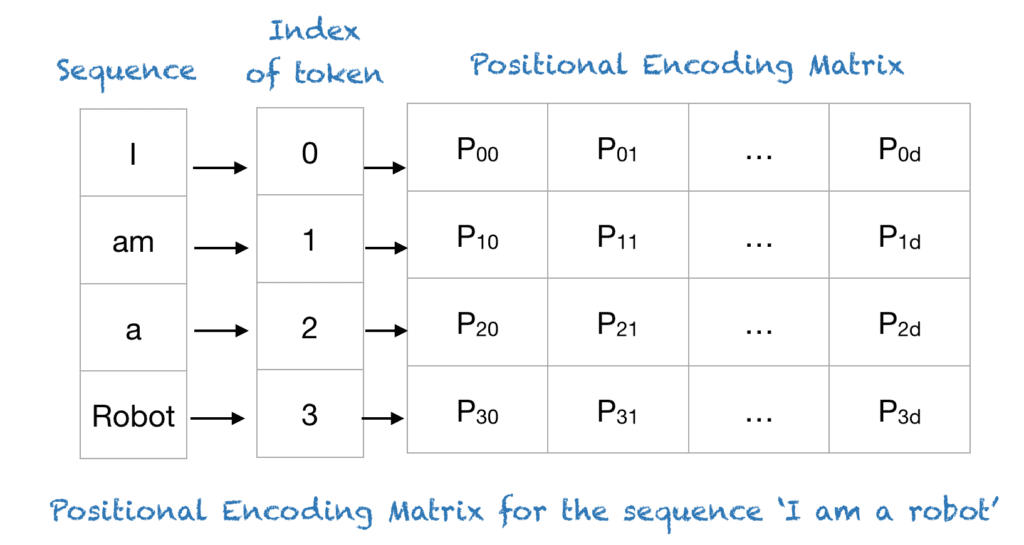


It makes use of trigonometric functions:
$$
f(t) = \sin(\lambda \cdot w \cdot t)
$$,
where $w$[rad/s] is the sinus frequency, $T = \frac{2\pi}{w}$[s] is the period and $\lambda$ the wavelength. Hence, if we have $\sin(2\cdot 2\cdot \pi\cdot t)$, it corresponds to $\lambda = 2$, $w = 2\cdot \pi$, $T = 1$s.

Now suppose we have an input sequence of length L and require the position of the k-th object within this sequence. The positional encoding is then given by the sine and cosine functions of varying frequences:

$$P(k,2i) = \sin\left(\frac{k}{n^{\frac{2i}{d}}}\right)$$
$$P(k,2i + 1) = \cos\left(\frac{k}{n^{\frac{2i}{d}}}\right)$$
where
- k: Position of an object in the input sequence: $0\leq k \leq L/2$
- Dimension of the output embedding space.
- $P(k,j)$: Position function for mapping a position $k$ in the input sequence to index $(k,j)$ of the positional matrix.
- n: User-defined scalar, set to 10000 by the authors of [Attention is all you need](https://arxiv.org/abs/1706.03762).
- i: Used for mapping to column indices $0\leq i \leq d/2$, with a single value of $i$ maps to both sine and cosine functions.

Here we have a clearer example:
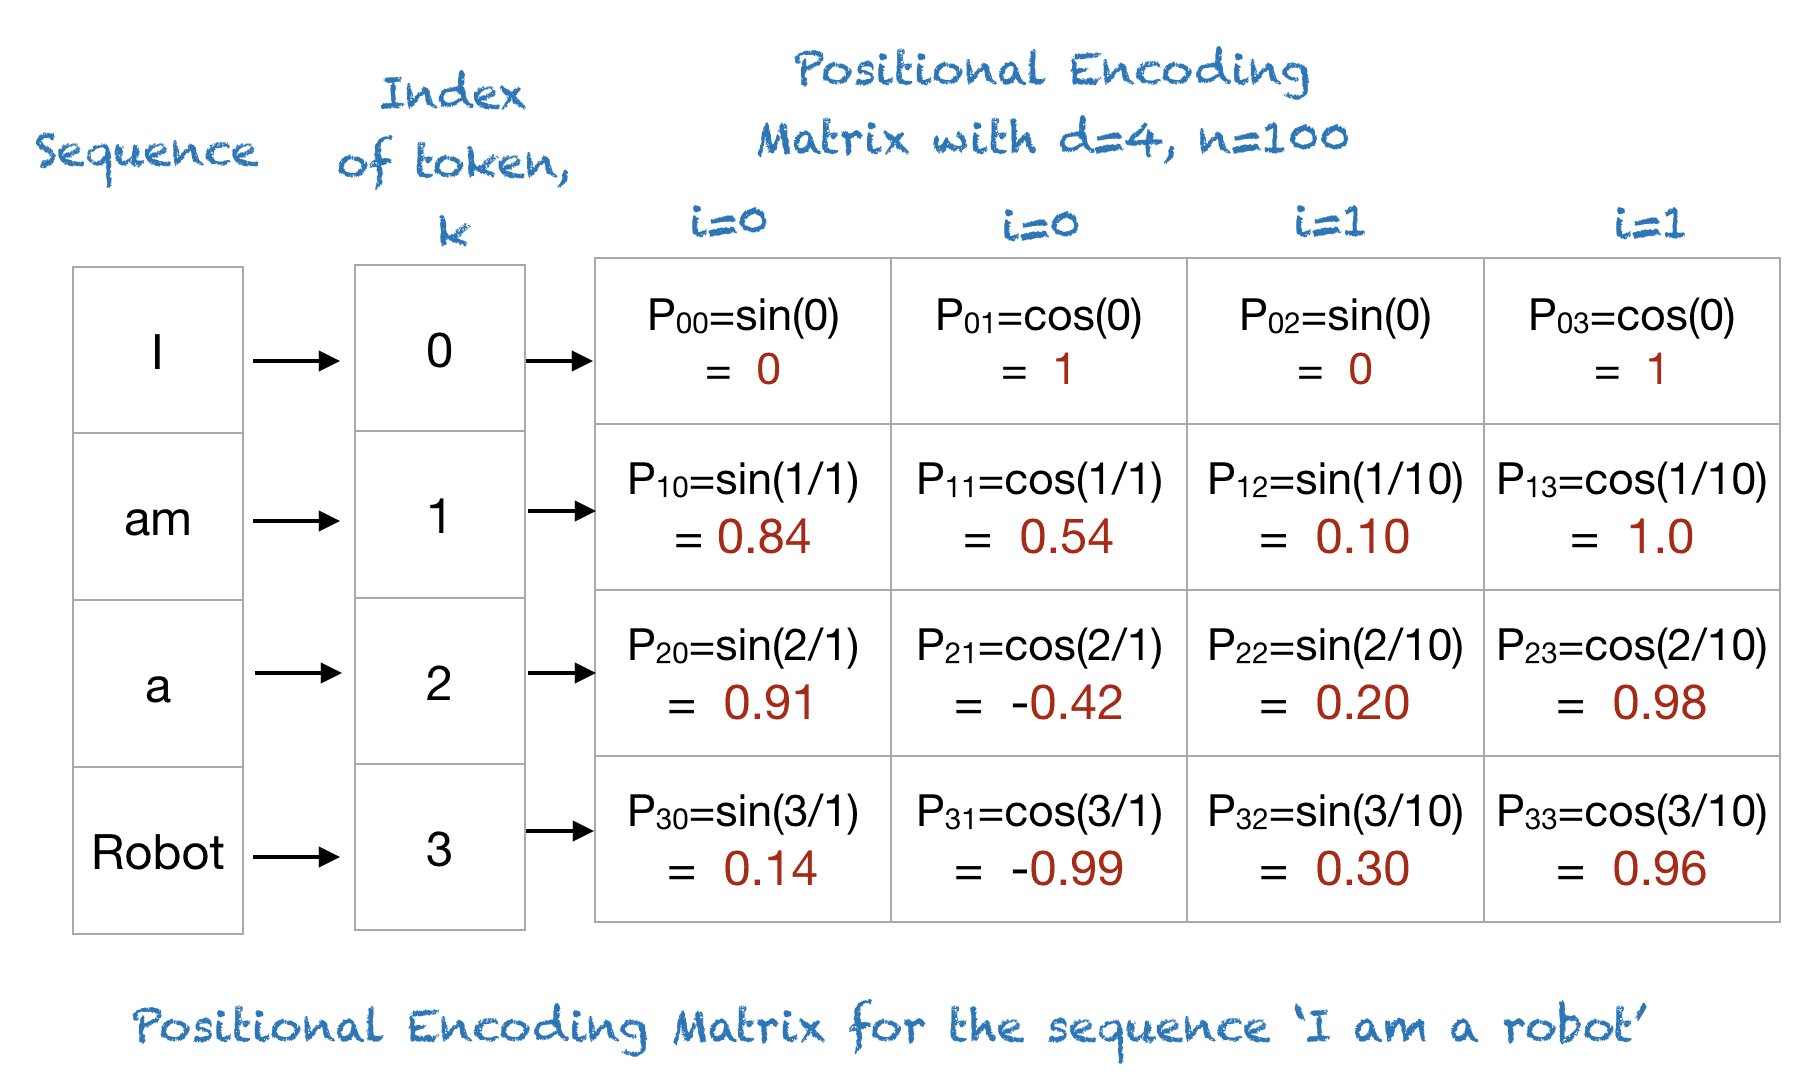


In [ ]:
x = "I am a Robot"
input1 = x.split(' ')
input2 = padded

def pos_embedding_matrix(input, d, n):

  matrix = np.zeros(shape = (d, len(input))) # Wrong!!
  matrix = np.zeros(shape = (len(input), d))

  for k in range(len(input)):
    for i in range(int(d/2)):
      matrix[k, 2*i] = np.sin(k/n**(2*i/d))
      matrix[k, 2*i + 1] = np.cos(k/n**(2*i/d))

  return matrix

"""
Solution:

import numpy as np
import matplotlib.pyplot as plt

def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

P = getPositionEncoding(seq_len=4, d=4, n=100)
print(P)
"""
d = padded.shape[0]
Matrix = pos_embedding_matrix(input2[0], d, 10000)





In [ ]:
padded

array([[ 2,  3,  4,  5,  0,  0,  0,  0,  0],
       [ 6,  7,  8,  9,  0,  0,  0,  0,  0],
       [10, 11, 12, 13, 14,  0,  0,  0,  0],
       [15, 16, 17, 18, 19, 20, 21,  0,  0]], dtype=int32)

In [ ]:
Matrix

array([[ 0.        ,  1.        ,  0.        ,  1.        ],
       [ 0.84147098,  0.54030231,  0.00999983,  0.99995   ],
       [ 0.90929743, -0.41614684,  0.01999867,  0.99980001],
       [ 0.14112001, -0.9899925 ,  0.0299955 ,  0.99955003],
       [-0.7568025 , -0.65364362,  0.03998933,  0.99920011],
       [-0.95892427,  0.28366219,  0.04997917,  0.99875026],
       [-0.2794155 ,  0.96017029,  0.05996401,  0.99820054],
       [ 0.6569866 ,  0.75390225,  0.06994285,  0.997551  ],
       [ 0.98935825, -0.14550003,  0.07991469,  0.99680171]])

In [ ]:
print(f"Input = {input2[0]}")
print(f"Output matrix = {Matrix}")

Input = [2 3 4 5 0 0 0 0 0]
Output matrix = [[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.00999983  0.99995   ]
 [ 0.90929743 -0.41614684  0.01999867  0.99980001]
 [ 0.14112001 -0.9899925   0.0299955   0.99955003]
 [-0.7568025  -0.65364362  0.03998933  0.99920011]
 [-0.95892427  0.28366219  0.04997917  0.99875026]
 [-0.2794155   0.96017029  0.05996401  0.99820054]
 [ 0.6569866   0.75390225  0.06994285  0.997551  ]
 [ 0.98935825 -0.14550003  0.07991469  0.99680171]]


In [ ]:
obt = out_embedding
for sentence in obt:
  obt = obt + Matrix

obt

<tf.Tensor: shape=(4, 9, 4), dtype=float32, numpy=
array([[[-0.0482394 ,  4.0301948 , -0.04998225,  3.9608963 ],
        [ 3.384916  ,  2.125745  ,  0.01014697,  4.0098577 ],
        [ 3.6048603 , -1.6645212 ,  0.08930746,  3.9874907 ],
        [ 0.51552516, -3.9416304 ,  0.08949097,  3.9891984 ],
        [-3.0211794 , -2.5806918 ,  0.16120526,  3.973613  ],
        [-3.8296666 ,  1.1685313 ,  0.20116459,  3.9718137 ],
        [-1.1116313 ,  3.8745637 ,  0.24110393,  3.969615  ],
        [ 2.633977  ,  3.0494914 ,  0.2810193 ,  3.9670167 ],
        [ 3.9634635 , -0.54811764,  0.3209067 ,  3.9640198 ]],

       [[-0.00891959,  4.0379744 ,  0.03347529,  4.024857  ],
        [ 3.3777392 ,  2.1494627 , -0.00435152,  3.9598274 ],
        [ 3.6473885 , -1.6892551 ,  0.03066281,  4.047397  ],
        [ 0.5884063 , -4.000972  ,  0.14059909,  3.9483662 ],
        [-3.0211794 , -2.5806918 ,  0.16120526,  3.973613  ],
        [-3.8296666 ,  1.1685313 ,  0.20116459,  3.9718137 ],
        [-1.11163

Let us understand better what is truly happening here:


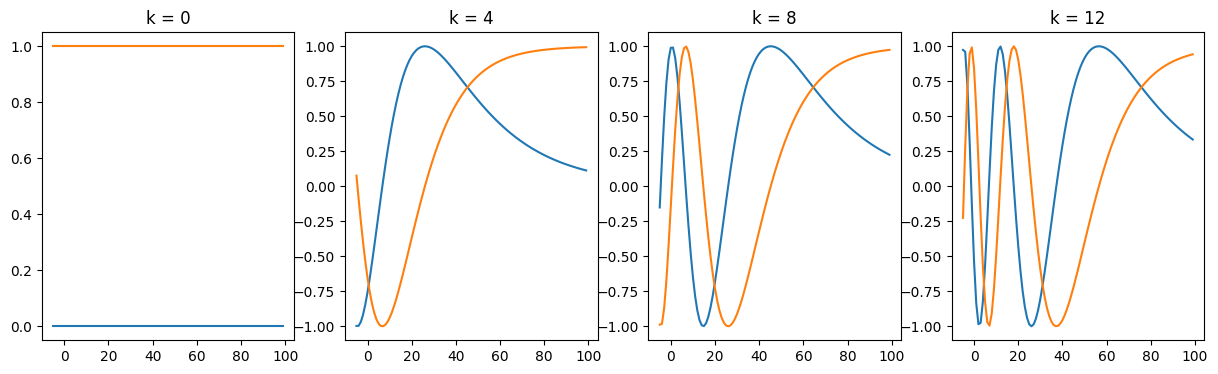

In [ ]:
def plotsinus(k, d = 512, n = 10000):
  x = np.arange(-5,100,1)
  den = np.power(n, 2*x/d)
  y_sin = np.sin(k/den)
  y_cos = np.cos(k/den)
  plt.plot(x,y_sin)
  plt.plot(x,y_cos)
  plt.title('k = ' + str(k))

fig = plt.figure(figsize = (15,4))
for i in range(4):
  plt.subplot(141 + i)
  plotsinus(i*4)

We observe that each position $k$ corresponds to a different sinusoid, which encodes a single position into a vector. We can see that the wavelength for a fixed $i$ is given by $\lambda_i = 2\cdot \pi \cdot n^{2i/d}$. Moreover, with sine and cosine functions we are kind of converting the positions into their binary counterparts, as can be seen in the following image:
\begin{align}
  0: \ \ \ \ \color{orange}{\texttt{0}} \ \ \color{green}{\texttt{0}} \ \ \color{blue}{\texttt{0}} \ \ \color{red}{\texttt{0}} & &
  8: \ \ \ \ \color{orange}{\texttt{1}} \ \ \color{green}{\texttt{0}} \ \ \color{blue}{\texttt{0}} \ \ \color{red}{\texttt{0}} \\
  1: \ \ \ \ \color{orange}{\texttt{0}} \ \ \color{green}{\texttt{0}} \ \ \color{blue}{\texttt{0}} \ \ \color{red}{\texttt{1}} & &
  9: \ \ \ \ \color{orange}{\texttt{1}} \ \ \color{green}{\texttt{0}} \ \ \color{blue}{\texttt{0}} \ \ \color{red}{\texttt{1}} \\
  2: \ \ \ \ \color{orange}{\texttt{0}} \ \ \color{green}{\texttt{0}} \ \ \color{blue}{\texttt{1}} \ \ \color{red}{\texttt{0}} & &
  10: \ \ \ \ \color{orange}{\texttt{1}} \ \ \color{green}{\texttt{0}} \ \ \color{blue}{\texttt{1}} \ \ \color{red}{\texttt{0}} \\
  3: \ \ \ \ \color{orange}{\texttt{0}} \ \ \color{green}{\texttt{0}} \ \ \color{blue}{\texttt{1}} \ \ \color{red}{\texttt{1}} & &
  11: \ \ \ \ \color{orange}{\texttt{1}} \ \ \color{green}{\texttt{0}} \ \ \color{blue}{\texttt{1}} \ \ \color{red}{\texttt{1}} \\
  4: \ \ \ \ \color{orange}{\texttt{0}} \ \ \color{green}{\texttt{1}} \ \ \color{blue}{\texttt{0}} \ \ \color{red}{\texttt{0}} & &
  12: \ \ \ \ \color{orange}{\texttt{1}} \ \ \color{green}{\texttt{1}} \ \ \color{blue}{\texttt{0}} \ \ \color{red}{\texttt{0}} \\
  5: \ \ \ \ \color{orange}{\texttt{0}} \ \ \color{green}{\texttt{1}} \ \ \color{blue}{\texttt{0}} \ \ \color{red}{\texttt{1}} & &
  13: \ \ \ \ \color{orange}{\texttt{1}} \ \ \color{green}{\texttt{1}} \ \ \color{blue}{\texttt{0}} \ \ \color{red}{\texttt{1}} \\
  6: \ \ \ \ \color{orange}{\texttt{0}} \ \ \color{green}{\texttt{1}} \ \ \color{blue}{\texttt{1}} \ \ \color{red}{\texttt{0}} & &
  14: \ \ \ \ \color{orange}{\texttt{1}} \ \ \color{green}{\texttt{1}} \ \ \color{blue}{\texttt{1}} \ \ \color{red}{\texttt{0}} \\
  7: \ \ \ \ \color{orange}{\texttt{0}} \ \ \color{green}{\texttt{1}} \ \ \color{blue}{\texttt{1}} \ \ \color{red}{\texttt{1}} & &
  15: \ \ \ \ \color{orange}{\texttt{1}} \ \ \color{green}{\texttt{1}} \ \ \color{blue}{\texttt{1}} \ \ \color{red}{\texttt{1}} \\
\end{align}

## 2 - Transformer blocks

Each transformer module has is built-up by the following terms:

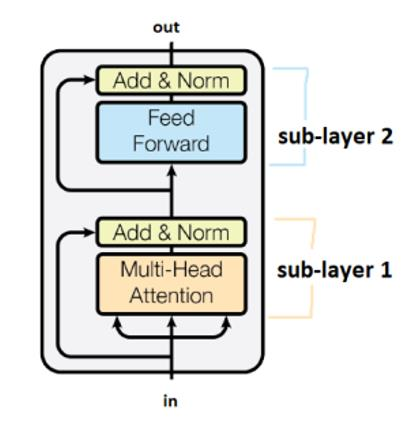

### 2.1 -  Multi-Head Attention
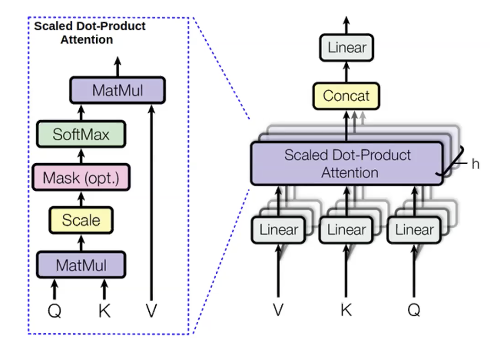

## References
1. [A Gentle Introduction to Positional Encoding in Transformer Models, Part 1](https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/)
2. [Transformer Architecture: The Positional Encoding](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/)
3. [How Transformers Work: A Detailed Exploration of Transformer Architecture](https://www.datacamp.com/tutorial/how-transformers-work)
4. [Visual Guide to Transformer Neural Networks - (Episode 1) Position Embeddings](https://www.youtube.com/watch?v=dichIcUZfOw)
5. [All you need to know about Attention and Transformers](https://towardsdatascience.com/all-you-need-to-know-about-attention-and-transformers-in-depth-understanding-part-1-552f0b41d021)

In [ ]:
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
x = ["Hello how are you?"] # But if we use x = "Hello how are you than the tokens are letters
tokenizer = Tokenizer(num_words = 100, oov_token = "<OOV>")
tokenizer.fit_on_texts(x)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(x)
model = keras.Sequential()
model.add(keras.layers.Embedding(1000, 64))

In [ ]:
embed = keras.layers.Embedding(50_000, 3)
embed(sequences)
sequ

ValueError: Only input tensors may be passed as positional arguments. The following argument value should be passed as a keyword argument: 2 (of type <class 'int'>)

In [ ]:
import numpy as np
sequences = np.array(sequences)
embed(sequences)

<tf.Tensor: shape=(1, 4, 3), dtype=float32, numpy=
array([[[ 0.04415027,  0.01178475,  0.03129861],
        [ 0.02973295,  0.04911195,  0.0431701 ],
        [ 0.03017138,  0.00770153,  0.03076973],
        [-0.03575581,  0.04039863, -0.02979439]]], dtype=float32)>

In [ ]:
import torch
import math

# Parámetros del modelo
d_model = 512  # Dimensión del vector de embedding
max_len = 100  # Longitud máxima de la secuencia

pe = torch.zeros(max_len, d_model)
print("Matriz inicial de encodings posicionales (pe):\\n", pe)

position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
print("Posiciones (position):\\n", position)


div_term = torch.exp(torch.arange(0,d_model, 2).float()*(-math.log(10000.0) / d_model))
pe[:, 0::2] = torch.sin(position * div_term)
pe[:, 1::2] = torch.cos(position * div_term)
print("Matriz de encodings posicionales después de aplicar seno y coseno (pe):\\n", pe)

Matriz inicial de encodings posicionales (pe):\n tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Posiciones (position):\n tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.

# References
* [How to choose the right embedding model for your LLM applicaiton](https://medium.com/@ashutoshs81127/how-to-choose-the-right-embedding-model-for-your-llm-application-7f5b257fd389)